In [ ]:
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install num2words
import num2words
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import math
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence
import seaborn as sns
from keras.preprocessing.text import Tokenizer
from numpy import array
from numpy import asarray
from numpy import zeros
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import SGD, Adam
import tensorflow as tf
from keras.layers.convolutional import Conv1D 
from keras.layers import GlobalMaxPooling1D
from tensorflow.keras.optimizers import SGD, Adam
from sklearn.metrics import classification_report
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 23.8 MB/s 
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13723 sha256=96fefb3f1c606bd3017c05d8f16ee3b5a23bd1e5b00f63bccd1168e496820fe2
  Stored in directory: /root/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9
Successfully built docopt


In [ ]:
#step 1- Mount your Google Drive to Collaboratory
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df= pd.read_csv('/content/drive/MyDrive/ABSA_MS_Research_Project/roberta_labelling.csv')

In [ ]:
df.head()
len(df)

10003

Split into train and test



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


POSITIVE    6517
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

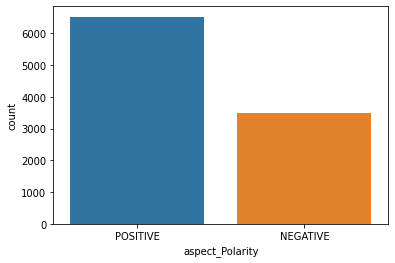

In [ ]:
sns.countplot(df.aspect_Polarity)
df.aspect_Polarity.value_counts()

In [ ]:
 from sklearn.utils import shuffle
 def cap_data(df):
    cap_df= pd.DataFrame()
    cap_df = df[df['aspect_Polarity']== 'POSITIVE'][:4000]
    cap_df = cap_df.append(df[df['aspect_Polarity']== 'NEGATIVE'])
    cap_df = shuffle(cap_df)   
    return(cap_df)

df = cap_data(df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


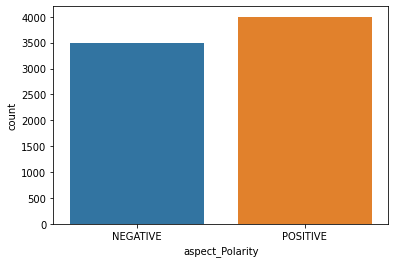

In [ ]:
import seaborn as sns
sns.countplot(df.aspect_Polarity)

In [ ]:
df.aspect_Polarity.value_counts()

POSITIVE    4000
NEGATIVE    3486
Name: aspect_Polarity, dtype: int64

In [ ]:
df.head()

,Unnamed: 0,Review,Rating,clean_reviews,sentence_reviews,room,staff,location,service,food,cosine_pred_category,cosine_pred_percentage,aspect_Polarity,asp_score
6062,6062,light dark bali just got bali mandira great li...,5,light dark bali got bali mandira great liked s...,traditional police came quoting driver crick ...,0.060638,0.202047,0.165205,0.152821,0.109079,staff,0.202047,NEGATIVE,0.997183
3760,3760,reservation problems thought contacting proper...,2,reservation problems thought contacting proper...,not feel special,0.142532,0.161317,0.040263,0.226631,0.196991,service,0.226631,POSITIVE,0.998103
1622,1622,enjoyed executive hotel pacific stayed hotel 2...,4,enjoyed executive hotel pacific stayed hotel t...,walked remember downtown area free zone metro...,0.166908,0.112949,0.270421,0.189942,0.167491,location,0.270421,POSITIVE,0.997003
1540,1540,great little place fantastic staff makes place...,5,great little place fantastic staff makes place...,n't pre arranged transport bus one hundred ni...,0.281606,0.261419,0.372318,0.297010,0.141364,location,0.372318,NEGATIVE,0.999251
6562,6562,"star nightmare, stayed hotels boston ranging 2...",1,"star nightmare, stayed hotels boston ranging t...",star nightmare,0.288360,0.146223,0.094620,0.187772,0.179133,room,0.288360,NEGATIVE,0.992995


In [ ]:
# labelling pos as 1 and neg as 0
def making_label(st):
    if(st=='POSITIVE'):
      return 1
    else:
        return 0
    
df['label'] = df['aspect_Polarity'].apply(making_label)
print(df.shape)

(7486, 15)


In [ ]:
# conversion of input data
df = pd.DataFrame({
    'text': df['sentence_reviews'].replace(r'\n', ' ', regex=True),
    'label': df['label']
})


In [ ]:
print(df.shape)
X = df['text']
y = df['label']


(7486, 2)


In [ ]:
df.head()

,text,label
6062,traditional police came quoting driver crick ...,0
3760,not feel special,1
1622,walked remember downtown area free zone metro...,1
1540,n't pre arranged transport bus one hundred ni...,0
6562,star nightmare,0


**Train_Test_Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5988,)
(1498,)
(5988,)
(1498,)


In [ ]:
X_train = X_train.astype(str)
X_test = X_test.astype(str)

**Preparing the Embedding Layer**

In [ ]:
tokenizer = Tokenizer(num_words=50000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1
maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [ ]:
vocab_size

6886

**Bi-LSTM**

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(['train','test'], loc = 'upper left')
  plt.show()

In [ ]:
BATCH_SIZE = 256

def evaluate(model,X_test,y_test):
    y_hat = model.predict(X_test,batch_size = BATCH_SIZE)
    print(y_hat)
    y_hat = (y_hat >= 0.5).astype(np.float32)
    print('rectified y_hat')
    print(y_hat)
    print(y_hat.shape)
    report = classification_report(y_test, y_hat)
    return report

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 100, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True,input_shape=(maxlen, vocab_size))),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          688600    
                                                                 
 bidirectional (Bidirectiona  (None, 100, 256)         234496    
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 100, 256)          0         
                                                                 
 flatten (Flatten)           (None, 25600)             0         
                                                                 
 dense (Dense)               (None, 1)                 25601     
                                                                 
Total params: 948,697
Trainable params: 948,697
Non-trainable params: 0
__________________________________________________

In [ ]:
num_epochs = 3
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=39)
history = model.fit(X_train, y_train, epochs=num_epochs, validation_split=0.2,batch_size = BATCH_SIZE, verbose=2,callbacks=[callback])


Epoch 1/3
19/19 - 15s - loss: 0.6887 - accuracy: 0.5347 - val_loss: 0.6790 - val_accuracy: 0.5459 - 15s/epoch - 766ms/step
Epoch 2/3
19/19 - 1s - loss: 0.5572 - accuracy: 0.7263 - val_loss: 0.5101 - val_accuracy: 0.7554 - 826ms/epoch - 43ms/step
Epoch 3/3
19/19 - 1s - loss: 0.3380 - accuracy: 0.8578 - val_loss: 0.5432 - val_accuracy: 0.7446 - 710ms/epoch - 37ms/step


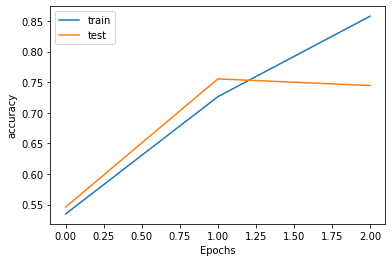

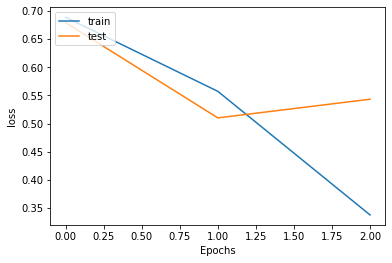

[[0.11087751]
 [0.08971254]
 [0.38266358]
 ...
 [0.9518338 ]
 [0.18640774]
 [0.45853165]]
rectified y_hat
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [0.]]
(1498, 1)
              precision    recall  f1-score   support

           0       0.79      0.69      0.74       683
           1       0.76      0.85      0.80       815

    accuracy                           0.78      1498
   macro avg       0.78      0.77      0.77      1498
weighted avg       0.78      0.78      0.77      1498



In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

report = evaluate(model,X_test,y_test)
print(report)

Hyperparameters Optimization

In [ ]:
def create_model(batch_size, vocab_size, embedding_dim, maxlen):
    model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=maxlen),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True,input_shape=(maxlen, vocab_size))),
      tf.keras.layers.Dropout(0.5),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
    model.summary()
    return model

In [ ]:
 # Parameter grid for grid search
param_grid = dict(batch_size=[64, 128, 256],
                      vocab_size=[vocab_size],
                      embedding_dim=[100],
                      maxlen=[maxlen])
model = KerasClassifier(build_fn=create_model,
                            epochs=3,
                            verbose=False)
grid = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                              cv=4, verbose=1, n_iter=5)
grid_result = grid.fit(X_train, y_train)

    # Evaluate testing set
test_accuracy = grid.score(X_test, y_test)
print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", grid_result.best_estimator_)
print("\n The best score across ALL searched params:\n", grid_result.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_result.best_params_)
test_accuracy

Fitting 4 folds for each of 3 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=5. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          688600    
                                                                 
 bidirectional_1 (Bidirectio  (None, 100, 256)         234496    
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 100, 256)          0         
                                                                 
 flatten_1 (Flatten)         (None, 25600)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                 25601     
                                                                 
Total params: 948,697
Trainable params: 948,697
Non-trainable params: 0
________________________________________________

0.7710280418395996

In [ ]:
def evaluate_cv(model,X_test,y_test):
    y_hat = model.predict(X_test)
    print(y_hat)
    print(y_hat.shape)
    report = classification_report(y_test, y_hat)
    return report

In [ ]:
report = evaluate_cv(grid_result,X_test,y_test)
print(report)

[[0]
 [0]
 [0]
 ...
 [1]
 [0]
 [1]]
(1498, 1)
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       683
           1       0.78      0.81      0.79       815

    accuracy                           0.77      1498
   macro avg       0.77      0.77      0.77      1498
weighted avg       0.77      0.77      0.77      1498



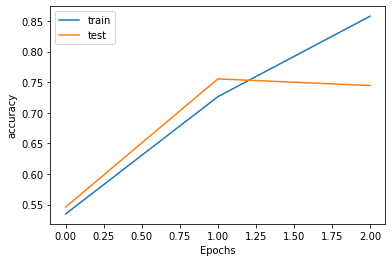

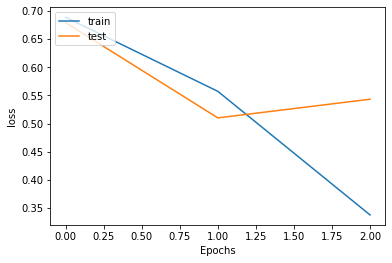

In [ ]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
